In [2]:
# mcmc is for later
import os
import sys
nb_dir = os.path.dirname(os.getcwd())
sys.path.append(nb_dir)

# Now you can import your module
# from pyro.infer.mcmc import MCMC
armature = {"nothing": 0}

primitve_shapes = {
    "triangle": "|\\",
    "point": ".",
    "quad": "[]",
    "triangle_strip": "|\\|\\|",
    "quad_strip": "[][][]",
}

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from bpygfn import ActionEncoder, StateFlowModel,example_usage

# Now you can import your module
# from pyro.infer.mcmc import MCMC
armature = {"nothing": 0}

primitve_shapes = {
    "triangle": "|\\",
    "point": ".",
    "quad": "[]",
    "triangle_strip": "|\\|\\|",
    "quad_strip": "[][][]",
}


encoder = ActionEncoder(max_sequence_length=32,
                        action_vocab=primitve_shapes.keys(),
                        positional_dim=4)

def compose_mesh(dx: list):
    return dx


# inital test
def is_blade_of_grass(mesh):
    # |\|/
    if all([x == "triangle" for x in mesh]) and len(mesh) % 2:
        return 3
    # |\|/|.
    if all([x == "triangle_strip" for x in mesh[:-1]]) and mesh[-1] == "point":
        return 6
    # [][][][].
    if all([x == "quad_strip" for x in mesh[:-1]]) and mesh[-1] == "point":
        return 3

    return 0
    # # pi prod
    # if reduce(lambda x, y: x * y, map(lambda x: primitve_shapes[x], mesh)) < 12:
    #     return True
    # else:
    #     return False


# this means that this will generate plolygons with proparty 2X as much
def mesh_reward(mesh):
    return is_blade_of_grass(mesh)

example_usage()

{'flow_matrix': tensor([[0.0000, 0.5157, 0.5120, 0.5402, 0.5107, 0.4868, 0.4905, 0.5096, 0.5055,
          0.5157],
         [0.5157, 0.0000, 0.5048, 0.4924, 0.5057, 0.5013, 0.4950, 0.5017, 0.4944,
          0.5050],
         [0.5120, 0.5048, 0.0000, 0.5092, 0.4948, 0.4932, 0.5228, 0.4904, 0.4843,
          0.5133],
         [0.5402, 0.4924, 0.5092, 0.0000, 0.4811, 0.4849, 0.4774, 0.4899, 0.4717,
          0.5198],
         [0.5107, 0.5057, 0.4948, 0.4811, 0.0000, 0.4898, 0.5254, 0.4931, 0.5010,
          0.5570],
         [0.4868, 0.5013, 0.4932, 0.4849, 0.4898, 0.0000, 0.5122, 0.4965, 0.4981,
          0.5294],
         [0.4905, 0.4950, 0.5228, 0.4774, 0.5254, 0.5122, 0.0000, 0.4879, 0.5092,
          0.5224],
         [0.5096, 0.5017, 0.4904, 0.4899, 0.4931, 0.4965, 0.4879, 0.0000, 0.4686,
          0.5236],
         [0.5055, 0.4944, 0.4843, 0.4717, 0.5010, 0.4981, 0.5092, 0.4686, 0.0000,
          0.5134],
         [0.5157, 0.5050, 0.5133, 0.5198, 0.5570, 0.5294, 0.5224, 0.5236, 0.

# Flow Network
- The goal of the flow network will be to generate examples *proportional* to `reward`
- the net in GflowNet refers to an MDP
- 'input_dims'
    - For choosing in this `primitve_shapes` example there are $4$ *patches*
> not sure if `source` and`sink` have to be a defined composition. or can by any composition with a given property that it finds




In [ ]:
import torch.nn as nn

"""
A neural network model class that inherits from `torch.nn.Module`.

Attributes:
-----------
mlp : torch.nn
    A multi-layer perceptron (MLP) neural network.

Methods:
--------
__init__(hid_dim: int) -> None
    Initializes the flowModdel class with a hidden dimension size.
"""


class FlowModel(nn.Module):
    def __init__(self, input_dims: any, num_emb: int, num_hid: int) -> None:
        super().__init__()
        # input_dim:int of possable actions
        self.mlp = nn.Sequential(
            nn.Linear(input_dims, num_emb), nn.LeakyReLU(), nn.Linear(num_emb, num_hid),
            nn.LeakyReLU(),
            nn.Linear(num_hid,)
        )

    def forward(self, x) -> any:
        # flow must be positive o

        # unclear to me how x contains this information
        # ...
        # and multiply by (1 - x) to give 0 flow to actions we know we can't take
        # (in this case, x[i] is 1 if a feature is already there, so we know we
        # can't add it again)
        # ...

        # in the paper this is F
        return self.mlp(x).exp()

- contructing trajectory
$$\sum_{s: (s,s')\in\mathcal{E}} F(s,s') = R(s') + \sum_{s'':(s',s'')\in\mathcal{E}} F(s',s'')$$

In [33]:
from typing import List, Tuple

def face_parents(state: List[str]) -> Tuple[List[List[str]], List[int]]:
    """
    Find parent states and their corresponding actions for a given state.
    
    Args:
        state: Current state represented as a list of face parts
        
    Returns:
        Tuple of (parent_states, parent_actions) where:
        - parent_states is a list of states, each missing one face part
        - parent_actions is a list of indices corresponding to the removed parts
    """
    # Create parent states by removing one face part at a time
    parent_states = [[part for part in state if part != face_part] 
                    for face_part in state]
    
    # Sort the state to create sorted_keys
    sorted_keys = sorted(state)
    
    # Find the action index for each removed face part
    parent_actions = [sorted_keys.index(face_part) 
                     for face_part in state]
    
    return parent_states, parent_actions

- state to tensor

# Train for Experiment

1. Set up `mlflow` : from `./notebooks` dir run
    ``` bash
    # im useing poatry so
    $ poetry run mlflow ui
    ```
2. open the server for the ui in browser
    ``` bash
    # example
    http//localhost:8000
    ```
3. run the cells below and check for logging info

In [36]:
import torch
import numpy as np


def face_to_tensor(face: list[str])->torch.Tensor:
    return encoder.positional_encode(face)


In [35]:
import os
from mlflow import log_metric, log_param, log_artifacts
import tqdm
import torch
from torch.optim import Adam
from torch.distributions.categorical import Categorical

# import duckdb
sorted_keys:list[str] = [*primitve_shapes.keys()]
max_bound = 32


# Instantiate model and optimizer
F_sa = FlowModel(hid_dim=512, input_dim=encoder.max_sequence_length)
opt = Adam(F_sa.parameters(), 3e-4)

# Let's keep track of the losses and the faces we sample
losses = []
sampled_faces = []
# To not complicate the code, I'll just accumulate losses here and take a
# gradient step every `update_freq` episode.
minibatch_loss = 0
update_freq = 4
for episode in tqdm.tqdm(range(50000), ncols=40):
    # Each episode starts with an "empty state"
    state = []
    # Predict F(s, a)
    edge_flow_prediction = F_sa(face_to_tensor(state))
    for t in range(max_bound):
        # The policy is just normalizing, and gives us the probability of each action
        policy = edge_flow_prediction / edge_flow_prediction.sum()
        # Sample the action
        print(policy,new_state)
        action = Categorical(probs=policy).sample()
        # "Go" to the next state
        #print(f"Current state: {state},\n Sorted keys: {sorted_keys},\n State: {state}")
        new_state = state + [sorted_keys[action]]

        # Now we want to compute the loss, we'll first enumerate the parents
        parent_states, parent_actions = face_parents(new_state)
        # And compute the edge flows F(s, a) of each parent
        px = torch.stack([face_to_tensor(p) for p in parent_states])
        pa = torch.tensor(parent_actions).long()
        parent_edge_flow_preds = F_sa(px)[torch.arange(len(parent_states)), pa]
        # Now we need to compute the reward and F(s, a) of the current state,
        # which is currently `new_state`
        if is_blade_of_grass(new_state):
            # If we've built a complete face, we're done, so the reward is > 0
            # (unless the face is invalid)
            reward = mesh_reward(new_state)
            # and since there are no children to this state F(s,a) = 0 \forall a
            edge_flow_prediction = torch.zeros(len(primitve_shapes))
        else:
            # Otherwise we keep going, and compute F(s, a)
            reward = 0
            edge_flow_prediction = F_sa(face_to_tensor(new_state))

        # The loss as per the equation above
        flow_mismatch = (
            parent_edge_flow_preds.sum() - edge_flow_prediction.sum() - reward
        ).pow(2)
        minibatch_loss += flow_mismatch  # Accumulate
        # Continue iterating
        state = new_state

    # We're done with the episode, add the face to the list, and if we are at an
    # update episode, take a gradient step.
    sampled_faces.append(state)
    if episode % update_freq == 0:
        losses.append(minibatch_loss.item())
        minibatch_loss.backward()
        opt.step()
        opt.zero_grad()
        minibatch_loss = 0


  0%|         | 0/50000 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x9 and 32x512)

tensor(0.3951, grad_fn=<SumBackward0>)

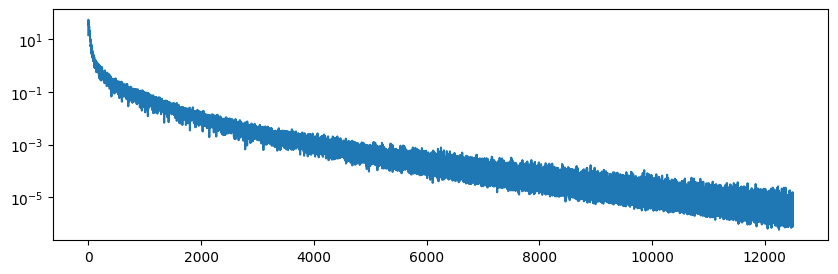

In [85]:
import matplotlib.pyplot as pp
import numpy as np
from collections import Counter

pp.figure(figsize=(10,3))
pp.plot(losses)
pp.yscale('log')

# why are they all zero??
Counter(map(is_blade_of_grass,sampled_faces))
F_sa(face_to_tensor([])).sum()
# for x in sampled_faces:
#     print(f"R:{is_blade_of_grass(x)}")
#     print(x)
#     print("".join([ primitve_shapes[i]for i in x]))